In [21]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df_train  = pd.read_csv("data/TRAIN_SET.csv")

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [24]:
kfold = KFold(5, shuffle = True, random_state = 123)

### Model 1 - KNN using  BEDS, BATHS, SQUARE FEET, LOT SIZE, AGE, LATITUDE, LATITUDE, Bayes_RatingSchool, crime_percentage, Age, zipcode, Property type (5 classes)

In [25]:
# define model object and k value
k = 8
model1 = KNeighborsRegressor(k)
rmse = np.zeros((5,1))

for i, (train_index, test_index) in enumerate(kfold.split(df_train)):
    # get the cross validation train set and holdout set 
    df_tt = df_train.iloc[train_index]
    df_ho = df_train.iloc[test_index]

    #fit the model1 
    model1.fit(df_tt[['BEDS','BATHS', 'SQUARE FEET', 'LOT SIZE',  'zipcode', 'LATITUDE', 'LONGITUDE',
                      'Bayes_RatingSchool','crime_percentage', 'Age', 'Single Family', 'Townhouse', 'Condo', 'Multi_Family4', 'Multi_Family5']], df_tt[['log_price']])
    
    # predict values for holdout set 
    pred1 = model1.predict(df_ho[['BEDS','BATHS', 'SQUARE FEET', 'LOT SIZE',  'zipcode', 'LATITUDE', 'LONGITUDE',
                      'Bayes_RatingSchool','crime_percentage', 'Age', 'Single Family', 'Townhouse', 'Condo', 'Multi_Family4', 'Multi_Family5']])
    
    # record mse
    rmse[i] = np.sqrt(mean_squared_error(df_ho[['log_price']], pred1))
    i = i + 1

print('mean rmse for KNN model 1 is', rmse.mean())

mean rmse for KNN model 1 is 0.18651986987088973


## Model Calibration/Parameter Tuning

Model Claibration for KNearestNeighbors - parameter k

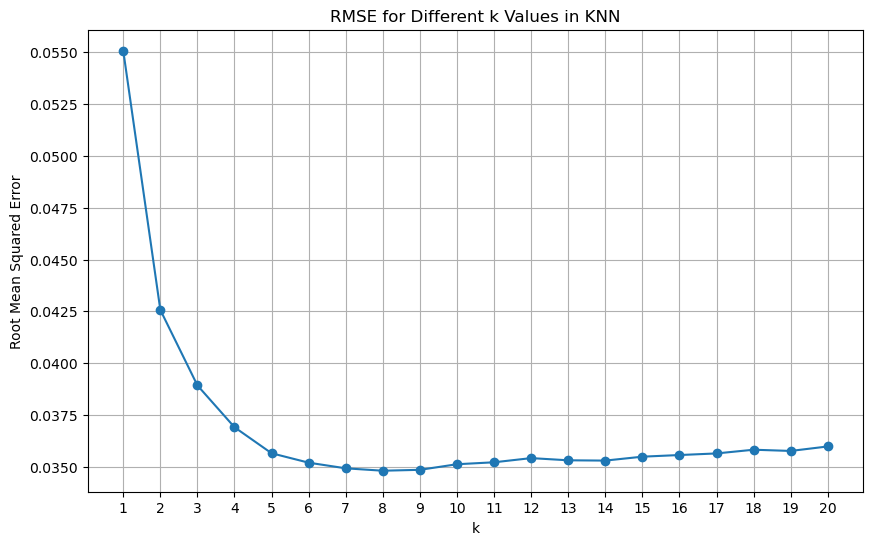

In [26]:
# define model object and k value
k_values = range(1, 21)
avg_rmse = []

for k in k_values:
    model1 = KNeighborsRegressor(k)
    rmse = np.zeros((5,1))
    
    for i, (train_index, test_index) in enumerate(kfold.split(df_train)):
        # get the cross validation train set and holdout set 
        df_tt = df_train.iloc[train_index]
        df_ho = df_train.iloc[test_index]
        
        #fit the model1 
        model1.fit(df_tt[['BEDS','BATHS', 'SQUARE FEET', 'LOT SIZE',  'zipcode', 'LATITUDE', 'LONGITUDE',
                      'Bayes_RatingSchool','crime_percentage', 'Age', 'Single Family', 'Townhouse', 'Condo', 'Multi_Family4', 'Multi_Family5']], df_tt[['log_price']])
    
        # predict values for holdout set 
        pred1 = model1.predict(df_ho[['BEDS','BATHS', 'SQUARE FEET', 'LOT SIZE',  'zipcode', 'LATITUDE', 'LONGITUDE',
                      'Bayes_RatingSchool','crime_percentage', 'Age', 'Single Family', 'Townhouse', 'Condo', 'Multi_Family4', 'Multi_Family5']])
    
        # record mse
        rmse[i] = np.sqrt(mean_squared_error(df_ho[['log_price']], pred1))
        i = i + 1
        
    avg_rmse.append(rmse.mean())


plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_mse, marker='o')
plt.title('RMSE for Different k Values in KNN')
plt.xlabel('k')
plt.ylabel('Root Mean Squared Error')
plt.xticks(k_values)
plt.grid(True)
plt.show()

      
    